# Assignment 6-2:
### https://github.com/YutingWuTia/comp-lab-class/blob/main/Week6/Assignment.md

Part1: Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals.

Part2: Use mdtraj to compute the phi and psi dihedrals from the output xtc file. 

Part3: Plot them on top of the ones from the COLVAR file, making sure they agree!

(I suggest you plot phi vs psi with plt.scatter to get a ramachandran-like plot instead of looking vs time)

Part4: Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.


In [20]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

### Part1: Use numpy to read in the COLVAR files and matplotlib to plot the dihedrals.

In [21]:
# load the Dihedral Angles data from COLVAR and check
time_A, phi_A, psi_A =np.loadtxt('/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/A/COLVAR', skiprows=5, unpack=True)

time_B, phi_B, psi_B =np.loadtxt('/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/B/COLVAR',skiprows=5, unpack=True)
print(time_A.shape)
print(time_B.shape)
print(phi_A.shape)
print(phi_B.shape)
print(psi_A.shape)
print(psi_B.shape)
print(time_A)
print(time_B)

(100001,)
(100001,)
(100001,)
(100001,)
(100001,)
(100001,)
[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]
[0.0000e+00 1.0000e+00 2.0000e+00 ... 9.9998e+04 9.9999e+04 1.0000e+05]


Plot saved: ../Figures/ADP_MetaStateA_DihedralAngles_COLVAR.pdf


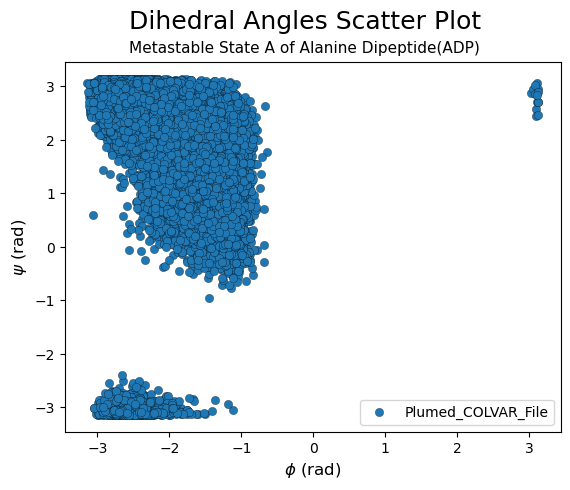

In [22]:
# plot phi_vs_psi from Metastable State A
fig=plt.figure(1)
plt.scatter(phi_A, psi_A, alpha=1, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.legend()
# set all labels
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Dihedral Angles Scatter Plot", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "Metastable State A of Alanine Dipeptide(ADP)", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_MetaStateA_DihedralAngles_COLVAR.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_MetaStateA_DihedralAngles_COLVAR.pdf")
plt.show()


Plot saved: ../Figures/ADP_MetaStateB_DihedralAngles_COLVAR.pdf


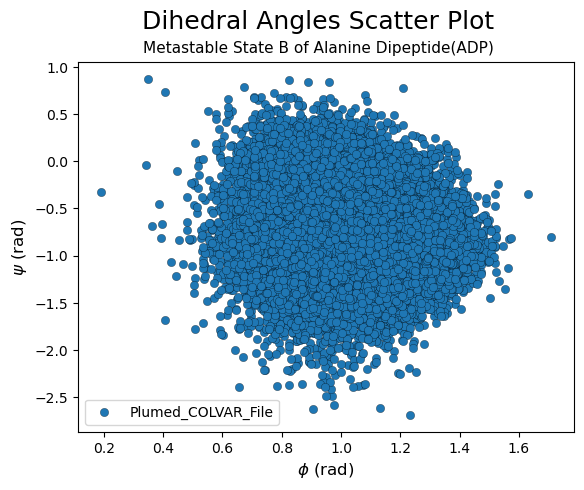

In [23]:
# plot phi_vs_psi from Metastable State B
fig=plt.figure(2)
plt.scatter(phi_B, psi_B, alpha=1, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.legend()
# set all labels
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Dihedral Angles Scatter Plot", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "Metastable State B of Alanine Dipeptide(ADP)", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_MetaStateB_DihedralAngles_COLVAR.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_MetaStateB_DihedralAngles_COLVAR.pdf")
plt.show()



### Part2: Use mdtraj to compute the phi and psi dihedrals from the output xtc file. 

In [24]:
# load the Dihedral Angles data from xtc file and check
# trajectory files
xtc_file_A='/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/A/traj_comp.xtc'
xtc_file_B='/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/B/traj_comp.xtc'
# topology files
gro_file_A = '/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/A/confout.gro'
gro_file_B = '/home/yw5806/comp-class/comp-lab-class/Week6/Inputs/assignment_2/B/confout.gro'
# load trajectory
traj_A = md.load(xtc_file_A, top=gro_file_A)
traj_B = md.load(xtc_file_B, top=gro_file_B)

print('traj_A', traj_A)
print('traj_B', traj_B)
print('traj_A.xyz.shape', traj_A.xyz.shape)
print('traj_B.xyz.shape', traj_B.xyz.shape)
print('traj_A.n_frames', traj_A.n_frames)
print('traj_B.n_frames', traj_B.n_frames)

traj_A <mdtraj.Trajectory with 100001 frames, 22 atoms, 3 residues, and unitcells>
traj_B <mdtraj.Trajectory with 100001 frames, 22 atoms, 3 residues, and unitcells>
traj_A.xyz.shape (100001, 22, 3)
traj_B.xyz.shape (100001, 22, 3)
traj_A.n_frames 100001
traj_B.n_frames 100001


In [25]:
# compute phi and psi from trajectory and check
# to be mentioned, the (phi_A, psi_A, phi_B, psi_B) are loaded from Plumed COLVAR File,
# So we use (A_phi, A_psi, B_phi, B_psi) to represent the dihedrals computed from trajectory xtc files
A_phi = md.compute_phi(traj_A)[1]
A_psi = md.compute_psi(traj_A)[1]
B_phi = md.compute_phi(traj_B)[1]
B_psi = md.compute_psi(traj_B)[1]
print(A_phi.shape)
print(A_psi.shape)
print(B_phi.shape)
print(B_psi.shape)
A_phi

(100001, 1)
(100001, 1)
(100001, 1)
(100001, 1)


array([[-1.2577689],
       [-2.7149851],
       [-2.3329206],
       ...,
       [-1.5381151],
       [-1.3553733],
       [-1.3826725]], dtype=float32)

### Part3: Plot them on top of the ones from the COLVAR file, making sure they agree!

Plot saved: ../Figures/ADP_MetaStateA_DihedralAngles_Comparison.pdf


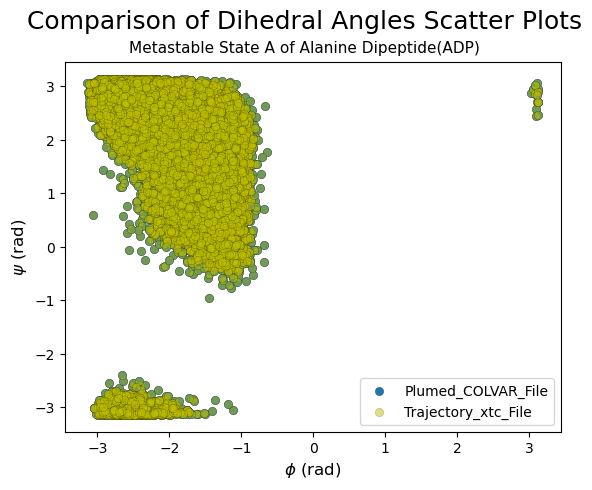

In [26]:
# plot phi_vs_psi from Metastable State A
fig=plt.figure(3)
plt.scatter(phi_A, psi_A, alpha=1, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.scatter(A_phi, A_psi, alpha=0.5, color="y", edgecolors="black",linewidths=0.2, label='Trajectory_xtc_File')
plt.legend()
# set all labels
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Comparison of Dihedral Angles Scatter Plots", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "Metastable State A of Alanine Dipeptide(ADP)", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_MetaStateA_DihedralAngles_Comparison.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_MetaStateA_DihedralAngles_Comparison.pdf")
plt.show()



Plot saved: ../Figures/ADP_MetaStateB_DihedralAngles_Comparison.pdf


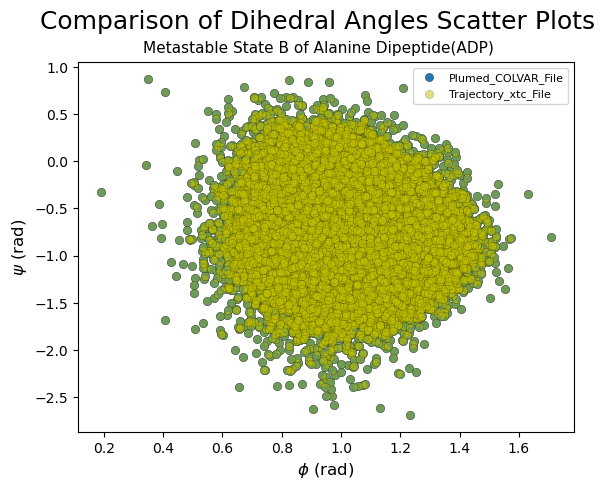

In [27]:
# plot phi_vs_psi from Metastable State B
fig=plt.figure(4)
plt.scatter(phi_B, psi_B, alpha=1, edgecolors="black",linewidths=0.2, label='Plumed_COLVAR_File')
plt.scatter(B_phi, B_psi, alpha=0.5, color="y", edgecolors="black",linewidths=0.2, label='Trajectory_xtc_File')
plt.legend(fontsize=8)
# set all labels
plt.xlabel(r'$\phi$ (rad)', fontsize=12)
plt.ylabel(r'$\psi$ (rad)', fontsize=12)
# set titles
plt.text(x=0.5, y=0.95, s="Comparison of Dihedral Angles Scatter Plots", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.9, s= "Metastable State B of Alanine Dipeptide(ADP)", fontsize=11, ha="center", transform=fig.transFigure)
# save figure
plt.savefig("../Figures/ADP_MetaStateB_DihedralAngles_Comparison.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_MetaStateB_DihedralAngles_Comparison.pdf")
plt.show()



In [28]:
print("It is pretty clear that all the scatters of the Dihedral Angles loaded from Plumed COLVAR Files (blue ones), are covered with which from xtc files (light yellow ones)")

It is pretty clear that all the scatters of the Dihedral Angles loaded from Plumed COLVAR Files (blue ones), are covered with which from xtc files (light yellow ones)


### Part4: Compute the standard deviation of phi and the standard deviation of psi from the unbiased runs to give you an idea of the SIGMA values for metadynamics in the next step.

In [29]:
# if we compare the arrays directly with python(like the following codes) the kernel will be dead
"""
if ( phi_A == A_phi ).all() and ( psi_A == A_psi ).all() and ( phi_B == B_phi ).all() and ( psi_B == B_psi ).all():
    print("the Dihedral Angles arrays are totally same")
else:
    print("wrong")
"""    
# so we should compute the standard deviation data from both COLVAR and xtc Files    

'\nif ( phi_A == A_phi ).all() and ( psi_A == A_psi ).all() and ( phi_B == B_phi ).all() and ( psi_B == B_psi ).all():\n    print("the Dihedral Angles arrays are totally same")\nelse:\n    print("wrong")\n'

In [30]:
# To be mentioned, the (phi_A, psi_A, phi_B, psi_B) are loaded from Plumed COLVAR File,
# (A_phi, A_psi, B_phi, B_psi) are from trajectory xtc files

# For meta state A
# compute standard deviation of the Dihedral Angle
std_phi_A_colvar = np.std(phi_A)
std_phi_A_xtc = np.std(A_phi)
std_psi_A_colvar = np.std(psi_A)
std_psi_A_xtc = np.std(A_psi)

# For meta state B
# compute standard deviation of the Dihedral Angles
std_phi_B_colvar = np.std(phi_B)
std_phi_B_xtc = np.std(B_phi)
std_psi_B_colvar = np.std(psi_B)
std_psi_B_xtc = np.std(B_psi)

print(" standard deviation of phi for meta state A:  ",std_phi_A_colvar,std_phi_A_xtc, " difference:",std_phi_A_colvar-std_phi_A_xtc)
print(" standard deviation of psi for meta state A:  ",std_psi_A_colvar,std_psi_A_xtc, " difference:",std_psi_A_colvar-std_psi_A_xtc)
print(" standard deviation of phi for meta state B:  ",std_phi_B_colvar,std_phi_B_xtc, " difference:",std_phi_B_colvar-std_phi_B_xtc)
print(" standard deviation of psi for meta state B:  ",std_psi_B_colvar,std_psi_B_xtc, " difference:",std_psi_B_colvar-std_psi_B_xtc)
print(" the differences were too small, so we could say they are the same. ") 

 standard deviation of phi for meta state A:   0.5530599531563185 0.55306  difference: -4.2018089452255936e-08
 standard deviation of psi for meta state A:   1.0344537789892605 1.0344537  difference: 2.9332583251218125e-08
 standard deviation of phi for meta state B:   0.132308110227487 0.13230811  difference: -3.6726244267981656e-10
 standard deviation of psi for meta state B:   0.3460001477738976 0.34600016  difference: -1.697334056638411e-08
 the differences were too small, so we could say they are the same. 
